In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
covid_df = pd.read_csv('/kaggle/input/covid-19-india/covid_19_india.csv')

In [3]:
covid_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [5]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


In [6]:
vaccine_df = pd.read_csv('/kaggle/input/covid19-vaccines-and-cases-dataset-state-wise/Covid vaccines and Cases Dataset Statewise (states  UTs).csv')

In [7]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   State Name                   36 non-null     object
 1   TOTAL CONFIRMED              36 non-null     int64 
 2   CURED/ DISCHARGED/ MIGRATED  36 non-null     int64 
 3   DEATH                        36 non-null     int64 
 4   Total Vaccine Doses          36 non-null     int64 
 5   First Dose                   36 non-null     int64 
 6   Second Dose                  36 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.1+ KB


In [8]:
vaccine_df.head(7)

,State Name,TOTAL CONFIRMED,CURED/ DISCHARGED/ MIGRATED,DEATH,Total Vaccine Doses,First Dose,Second Dose
0,Andaman And Nicobar,7572,7437,129,370432,262193,108239
1,Andra Pradesh,2021325,1992256,13911,31299846,22370089,8929757
2,Arunachal Pradesh,53338,52383,264,991138,732281,258857
3,Assam,591980,579935,5699,18512199,15168976,3343223
4,Bihar,725753,716033,9655,39540878,32919022,6621856
5,Chandigarh,65121,64267,814,1156172,827462,328720
6,Chattisgarh,1004635,990711,13556,14532424,11062785,3469639


In [9]:
covid_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [10]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], inplace = True , axis=1)

In [11]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [12]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'],format = '%Y-%m-%d')

In [13]:
covid_df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0


In [14]:
# Active cases

covid_df['Active_Cases'] = covid_df['Confirmed']-(covid_df['Cured'] + covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
15109,NaT,NaN,NaN,NaN,NaN,NaN
15110,NaT,NaN,NaN,NaN,NaN,NaN
15111,NaT,NaN,NaN,NaN,NaN,NaN
15112,NaT,NaN,NaN,NaN,NaN,NaN
15113,NaT,NaN,NaN,NaN,NaN,NaN


In [15]:
statewise = pd.pivot_table(covid_df,values = ["Confirmed","Deaths","Cured"], 
                           index="State/UnionTerritory",aggfunc=max)

In [16]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [17]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [18]:
statewise = statewise.sort_values(by="Confirmed",ascending = False)

In [19]:
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


In [20]:
# Top 10 active cases states

top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by = ['Active_Cases'],ascending = False).reset_index()

In [21]:
fig = plt.figure(figsize=(16,9))

<Figure size 1152x648 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in India')

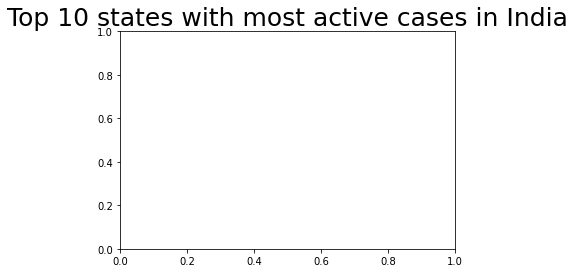

In [22]:
plt.title("Top 10 states with most active cases in India",size=25)

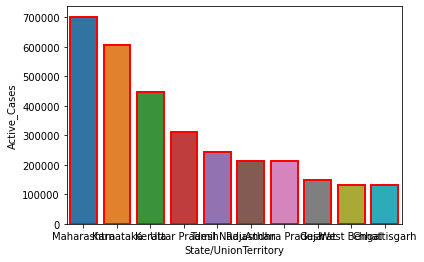

In [23]:
ax = sns.barplot(data=top_10_active_cases.iloc[:10],y="Active_Cases",x="State/UnionTerritory",linewidth=2,edgecolor = 'red')

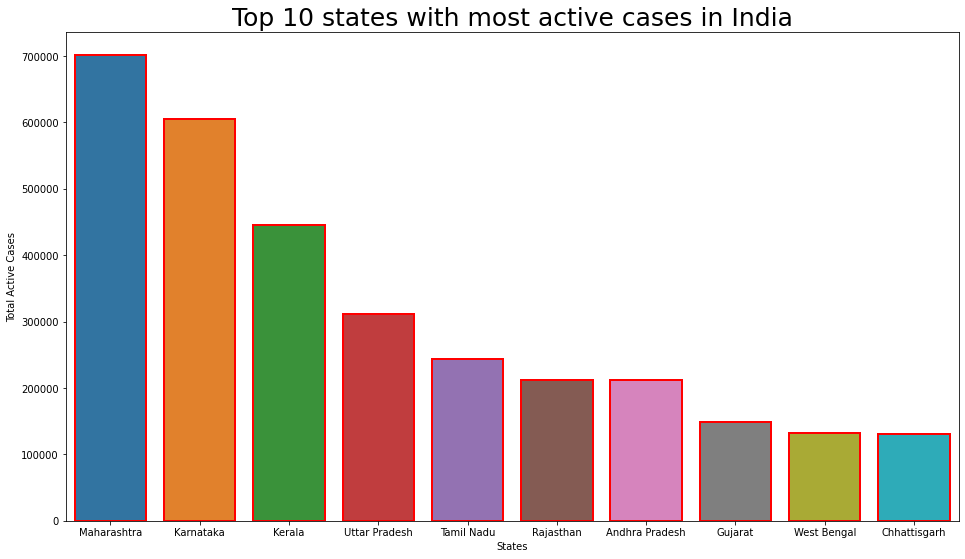

In [24]:
# Top 10 active cases states

top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by = ['Active_Cases'],ascending = False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in India",size=25)
ax = sns.barplot(data=top_10_active_cases.iloc[:10],y="Active_Cases",x="State/UnionTerritory",linewidth=2,edgecolor = 'red')

plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

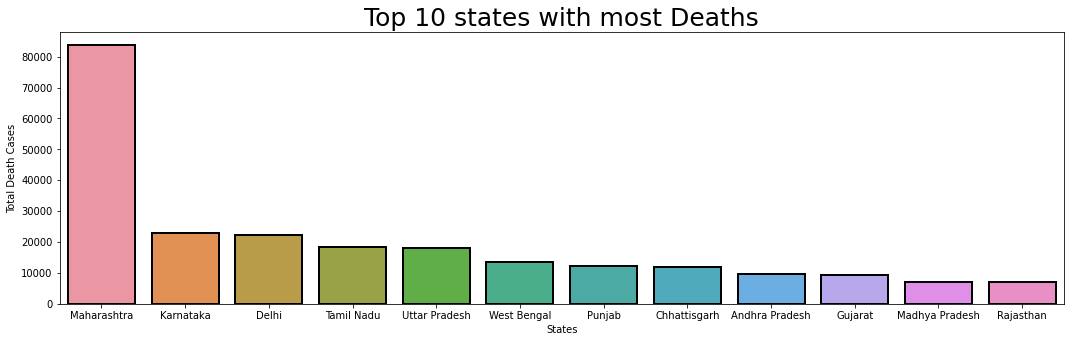

In [25]:
# Top states with highest deaths

top_10_deaths = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values (by = ['Deaths'], ascending= False).reset_index()

fig = plt.figure(figsize=(18,5))

plt.title("Top 10 states with most Deaths",size=25)

ax = sns.barplot(data = top_10_deaths.iloc[:12],y="Deaths", x="State/UnionTerritory",linewidth = 2, edgecolor = 'black')

plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

In [26]:
# Growth Trend

fig = plt.figure(figsize = (12,6))

ax = sns.lineplot(data = covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu','Uttar Pradesh']), x='Date' , y='Active_Cases', hue='State/UnionTerritory'])

ax.set_title("Top 5 Affected States in India",size=16)



SyntaxError: invalid syntax (3193395123.py, line 5)

In [ ]:
vaccine_df.head()

In [ ]:
vaccine_df.info()

In [ ]:
vaccine_df.rename(columns = {"State Name" : "State"},inplace = True)
vaccine_df.head()

In [ ]:
vaccine = vaccine_df[vaccine_df.State!='India']
vaccine

In [ ]:
vaccine.rename(columns = {"Total Vaccine Doses" : "Total"},inplace = True)
vaccine.head()

In [ ]:
# Most vaccinated states

max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total',ascending = False)[:5]
max_vac 

In [ ]:
fig = plt.figure(figsize = (10,5))
plt.title("Top 5 Vaccinated States in India",size=20)
x = sns.barplot(data = max_vac.iloc[:10], y = max_vac.Total, x=max_vac.index, linewidth=2, edgecolor= 'black')
plt.xlabel("States")
plt.ylabel("Vaccination")
plt.show()